<h1><center>La cicloide</center></h1>

 
[matplotlib_ref](https://riptutorial.com/Download/matplotlib.pdf)

[cicloide ref](https://es.wikipedia.org/wiki/Cicloide)

[Animation matplotlib Jake Vanderplas ref](https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/)
 
 

## Ecuaciones parámetricas de la cicloide

$$
x = r\,(t - \sin{t}), \; y = r\,(1-\cos{t}), \quad t \in R
$$

## Ecuación cartesiana

$$
x = r\, \arccos\left(1- \frac{y}{r}\right) - \sqrt{2r\, y - y^2}
$$

La ecuación cartesiana solo representa la mitad del primer bucle de la cicloide y sólo está definida cuando $0\le y\le 2\,r$. Mire que en la ecuación cartesiana la coordenada $x$ está en función de la coordenada $y$. Despejar $y$ en función de  $x$ es complicado...


In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

## Gráficos básicos

In [2]:
# Constantes importantes
pi = np.pi
r = 1
bucles = 2 

In [3]:
t = np.linspace(0,2*pi*bucles,1000)
x_cicl, y_cicl = r*(t - np.sin(t)), r*(1- np.cos(t))

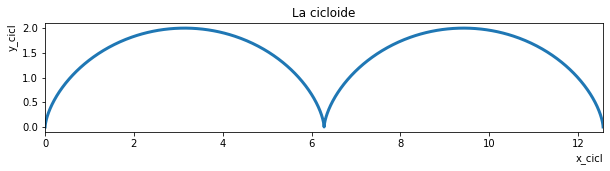

In [4]:
fig, ax = plt.subplots(figsize=(10, 2))
ax.plot(x_cicl, y_cicl, lw = 3)
ax.set_xlim(0, 2*pi*bucles)
ax.set_ylabel('y_cicl', loc='top')
ax.set_xlabel('x_cicl', loc='right')
ax.set_title("La cicloide")
plt.show()

In [5]:
cartesian = lambda y: r*np.arccos(1-y/r)- np.sqrt(2*r*y-y**2)
yy = np.linspace(0,2*r,100)

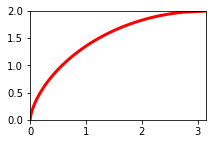

In [6]:
fig, ax = plt.subplots(figsize=(pi, 2*r))
ax.plot(cartesian(yy), yy, lw = 3, color ="red")
ax.set_xlim(0, pi)
ax.set_ylim(0, 2*r)
plt.show()

## Animación (movie)

Se trata de animar un punto que se mueve en un circulo que rueda a velocidad constante  


In [7]:
"""
Damos las coordenadas de una rueda de radio r 
"""
x_rueda, y_rueda = -r*np.cos(t), r - r*np.sin(t)


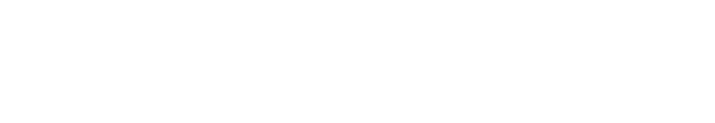

In [8]:
"""
Ponemos el telón de fondo e indicamos 
las coordenadas que van a ser actualizadas en cada cuadro (frames) 
"""
fig, ax = plt.subplots(figsize=(2*pi*bucles, 2*r))
ax.axis('off')
ax.set_xlim(-r, 2*pi*bucles+r)
ax.set_ylim(0, 2*r)
#ax.plot(x_circ,y_circ, color='r', alpha=0.5, lw = 4) 
rollingPoint, = plt.plot([],[], marker='o',  color='b', ms = 10)
rollingCircle, = plt.plot([],[], color='r', alpha=0.9)
estela_rollingPoint, = plt.plot([],[], color='b', alpha=0.95)
rollingRadius, = plt.plot([],[], color='r', alpha=0.5)

In [16]:
"""
Función de animación. Para cada valor de i genera un cuadro(frame) 
En cada cuadro hay tres elementos: la  posición actualizada del punto de la rueda, 
la rueda y un radio de la rueda para dar la ilusón de movimiento 
"""
def update(i):
    rollingPoint.set_data(x_cicl[i], y_cicl[i])
    estela_rollingPoint.set_data(x_cicl[:i+1],y_cicl[:i+1])
    rollingCircle.set_data( x_rueda + r*t[i],y_rueda )
    rollingRadius.set_data([x_cicl[i], r*t[i]], [y_cicl[i],r ] ) 
    return rollingPoint,estela_rollingPoint, rollingCircle, rollingRadius 

In [17]:
"""
Ahora se genera una animación con 1000 cuadros. El 1000 es el numero de puntos 
de la variable t
"""
anim = animation.FuncAnimation(fig, update, frames=range(1000), interval=10)
plt.show()

In [18]:
anim.save("movie.mp4")

In [ ]:
# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
anim.save('ncicloide.mp4', fps=60, extra_args=['-vcodec', 'libx264'])

plt.show()